<a href="https://colab.research.google.com/github/divaamahajan/DataMining/blob/main/Facebook_Live_sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Kaggle to import DB**

In [1]:
!pip install -q kaggle
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the Libraries and Data**


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

# **Import data directly from kaggle to the colab notebook**
**PreRequisite:**
1. Go to your kaggle account, 
2. Scroll to API section 
3. Click Expire API Token to remove previous tokens. 
4. Click on Create New API Token - It will download kaggle. json file on your machine.



In [3]:
from google.colab import files

# Upload the kaggle.json file that you downloaded in prereq
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyaamahajan","key":"0e5eb92c4aae7fd411f408cd68f5a1fc"}'}

In [4]:
#Make directory name kaggle
! mkdir ~/.kaggle
# !mkdir kaggle

In [5]:

#Copy the json kaggle to this directory
! cp kaggle.json ~/.kaggle/

In [6]:
!pwd # checking the present working directory

/content


In [7]:

#Allocate the required permission for this file.
!chmod 600 ~/.kaggle/kaggle.json
!ls -lha ~/.kaggle/kaggle.json


-rw------- 1 root root 69 Mar  6 22:52 /root/.kaggle/kaggle.json


In [8]:
# Sanity check if able to access kaggle
!kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           8980        291  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7469        176  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2257         73  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [9]:
#Downloading dataset
!kaggle datasets download -d ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo -p /content/kaggle

  0% 0.00/138k [00:00<?, ?B/s]
100% 138k/138k [00:00<00:00, 13.8MB/s]


In [10]:
# unzip data there,
# ! unzip facebook-live-sellers-in-thailand-uci-ml-repo -d facebook_live_seller
!unzip /content/kaggle/facebook-live-sellers-in-thailand-uci-ml-repo.zip -d /content/kaggle/facebook/

Archive:  /content/kaggle/facebook-live-sellers-in-thailand-uci-ml-repo.zip
  inflating: /content/kaggle/facebook/Live.csv  


In [11]:
# List the files in the directory to verify that the dataset has been downloaded and extracted
! ls facebook_live_seller

ls: cannot access 'facebook_live_seller': No such file or directory


# **Load Dataset**

**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [12]:
# reading the XLSX file
file =('/content/kaggle/facebook/Live.csv')
df = pd.read_csv(file)
  
# displaying the contents of the XLSX file
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
#check the shape(rowz X cols) of data
df.shape

(7050, 16)

**Observation** : We have a data with 7050 rows and 16 columns

# **Data Preprocessing**

**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.

**Stages of Data preprocessing for K-means Clustering**
1.  Data Cleaning
>* Removing duplicates
>* Removing irrelevant observations and errors
>* Removing unnecessary columns
>* Handling inconsistent data
>* Handling outliers and noise
2. Handling missing data

3. Data Integration

4. Data Transformation
>* Feature Construction
>* Handling skewness
>* Data Scaling
5. Data Reduction
>* Removing dependent (highly correlated) variables
>* Feature selection
>* PCA

## **Data Cleaning**

**Removing duplicates**

In [14]:
df = df.drop_duplicates()
print(df.shape)

(6999, 16)


**Observation** : We still have a data with 7050 rows and 16 columns. Therefore, no duplicates found


**Changing the Index of a DataFrame**

A pandas Index enhances the capabilities of NumPy arrays to enable more flexible slicing and labeling. In many situations, it is advantageous to utilize the data's uniquely valued identifying field as its index, such as ID.

In [15]:
# check if the selected column is unique
if df['status_id'].is_unique: 
  # if true then update
  df = df.set_index('status_id')

In [16]:
# Print the dataframe
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Observation** : status_id is not 100% unique to be called index

## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`




In [17]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64

**Observation** : Column1, Column2, Column3 and Column4 has 7050 null values from all 7050 rows

**Drop the empty columns**

Drop Column1, Column2, Column3 and Column4 as it has 7050 null values from all 7050 rows

In [18]:
toDrop = ['Column1', 'Column2', 'Column3', 'Column4']
df.drop(columns = toDrop, inplace = True,axis = 1) # drop a column from dataframe
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [19]:
#drop rows with NA values in any columns
df = df.dropna()

## **Removing unnecessary columns**

Let us first check the percent of uniqueness of each column

In [20]:
col_list = list(df)
for col in col_list:
  print(f"{col} : {len(df[col].unique())*100/df.shape[0]:.2f}% unique")


status_id : 99.97% unique
status_type : 0.06% unique
status_published : 98.77% unique
num_reactions : 15.25% unique
num_comments : 14.19% unique
num_shares : 7.16% unique
num_likes : 14.92% unique
num_loves : 3.27% unique
num_wows : 0.93% unique
num_hahas : 0.60% unique
num_sads : 0.34% unique
num_angrys : 0.20% unique


**Observation** We may drop the columns which will not impact our predictions but are highly unique ie: status_id, status_published 


Call the `drop()` function on our object, passing in the `inplace` parameter as True and the `axis` parameter as 1.

`drop(columns = [ 'colName1' , 'colName2' , 'colName3' ], inplace=True, axis = 1)`

Note: 
> *axis = Whether to drop labels from (0 = ‘index/row’) or (1 or ‘columns’).* 
>
>*inplace=True : This tells pandas that we want the changes to be made directly in our object and that it should look for the values to be dropped in the columns of the object.*


In [21]:
toDrop = ['status_id', 'status_published']
df.drop(columns = toDrop, inplace = True,axis = 1) # drop a column from dataframe
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Observation** status_type seems categorical. Let's check how many unique values it has

## **Data Transformation**

In [22]:
stype = df["status_type"].unique()
stype

array(['video', 'photo', 'link', 'status'], dtype=object)

In [23]:
#creating dictionary for above variables
status_type_dict, i = dict(),0
for st in stype:
  status_type_dict[st] = i
  i += 1

#update datset
df_dataset = df #backing up the originals for conclusions
df = df.applymap(lambda s: status_type_dict.get(s) if s in status_type_dict else s)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [24]:
df["status_type"].unique()

array([0, 1, 2, 3])

## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [25]:
from scipy import stats
z_scores = np.abs(stats.zscore(df, nan_policy='omit'))
z_scores.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.102454,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,0.15999
1,0.314119,0.165606,0.252669,0.304903,0.136392,0.317962,0.143599,0.175780,0.157059,0.15999
2,1.102454,0.004428,0.011704,0.126793,0.013530,0.205677,0.028985,0.076069,0.157059,0.15999
3,0.314119,0.251728,0.252669,0.304903,0.225125,0.317962,0.143599,0.175780,0.157059,0.15999
4,0.314119,0.026487,0.252669,0.304903,0.013530,0.093545,0.143599,0.175780,0.157059,0.15999


    #Note: Tried Z score as 3. It was removing status type = 3. Therefore, chose Z score = 4 

In [26]:
outliers_threshold = 4
mask = (z_scores <= outliers_threshold).all(axis=1)
mask[mask == False].to_frame()

,0
6,False
45,False
99,False
106,False
107,False
...,...
6964,False
6974,False
6977,False
6978,False


**Observation:** From 7050 rows 401 rows are found to be outliers.

Let us remove these outliers.

In [67]:
df_cleaned = df[mask]
df_dataset = df_dataset[mask]
df_cleaned.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [28]:
df_cleaned.shape

(6581, 10)

In [29]:
df_cleaned["status_type"].unique()

array([0, 1, 2, 3])

We now have 6649 rows of clean data


## **Data Transformation**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if you need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [30]:
#Importing required modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df_cleaned)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df_cleaned))
df_scaled.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,0.266499,0.135128,0.464539,0.219512,0.531792,0.090909,0.066667,0.166667,0.0
1,0.333333,0.075567,0.000000,0.000000,0.076220,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.114358,0.062286,0.101064,0.103659,0.121387,0.030303,0.066667,0.000000,0.0
3,0.333333,0.055919,0.000000,0.000000,0.056402,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.107305,0.000000,0.000000,0.103659,0.052023,0.000000,0.000000,0.000000,0.0


# **KMeans Clustering**

## **Find the Optimal Number of Clusters**

**Distortion:**
It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used. ~ Inter-cluster Distances.


**Inertia:** 
It is the sum of squared distances of samples to their closest cluster center. ~Intra-cluster Distances.

---
We don’t know beforehand how many clusters is optimal so we must create a plot that displays the number of clusters along with the SSE*(sum of squared errors)* of the model.

Typically when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off. This is typically the optimal number of clusters.

We iterate the values of k from 1 to 10 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [31]:
K = range(1, 11)
inertias = []
distortions = []
distortion_map = {}
inertia_map = {}

#create list to hold inertias values for each k(number of clusters)
# The one with the lowest inertias can be chosen to be number of clusters

for k in K:
	# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df_scaled.shape[0])
    distortion_map[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_scaled.shape[0]
    inertia_map[k] = kmeanModel.inertia_


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

**Visualize results with Inertia~ Intra-cluster Distances**

In [32]:
for key, val in inertia_map.items():
	print(f'{key} : {val}')

1 : 1095.0310854701634
2 : 803.2600687099175
3 : 600.0113323397563
4 : 460.8285336630472
5 : 349.3725338167634
6 : 298.35966169252396
7 : 272.44996122081506
8 : 249.7734375178381
9 : 227.77537611625877
10 : 210.41778991785037


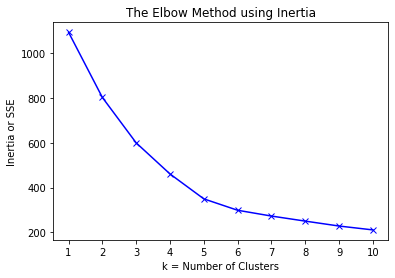

In [33]:
#visualize results
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Inertia')
plt.show()

**Visualize results with Distortions~Inter-cluster Distances**

In [34]:
for key, val in distortion_map.items():
	print(f'{key} : {val}')

1 : 0.3039741883713311
2 : 0.2527762456231793
3 : 0.2326707652928136
4 : 0.17918345668175306
5 : 0.1483052062794084
6 : 0.13794317319671875
7 : 0.13245301051629924
8 : 0.11848654507124749
9 : 0.11406702948854386
10 : 0.11088185258103975


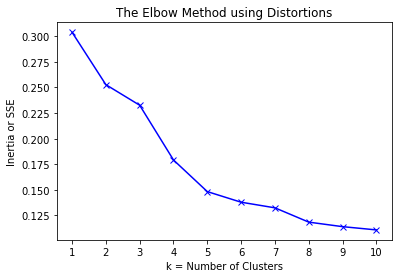

In [35]:
#visualize results
plt.plot(K, distortions, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Distortions')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5

**Perform K-Means Clustering with Optimal K**

In [36]:
#instantiate the k-means class, using optimal number of clusters
kmeanModel_kfixed = KMeans( n_clusters=5)

# We are going to use the fit predict method that returns for each observation 
# which cluster it belongs to. The cluster to which #client belongs and it will
# return this cluster numbers into a single vector that is  called y K-means
#fit k-means algorithm to data
kmeanModel_kfixed = kmeanModel_kfixed.fit(df_scaled)
label = kmeanModel_kfixed.fit_predict(df_scaled)

#view cluster assignments for each observation
kmeanModel_kfixed.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 3, ..., 0, 0, 0], dtype=int32)

In [37]:
#append cluster assingments to original DataFrame
df_kmeans = pd.concat([df_scaled.reset_index(drop = True)], axis = 1)
df_kmeans['cluster_k'] = kmeanModel_kfixed.labels_

#view updated DataFrame
df_kmeans.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_k
0,0.000000,0.266499,0.135128,0.464539,0.219512,0.531792,0.090909,0.066667,0.166667,0.0,1
1,0.333333,0.075567,0.000000,0.000000,0.076220,0.000000,0.000000,0.000000,0.000000,0.0,0
2,0.000000,0.114358,0.062286,0.101064,0.103659,0.121387,0.030303,0.066667,0.000000,0.0,3
3,0.333333,0.055919,0.000000,0.000000,0.056402,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.333333,0.107305,0.000000,0.000000,0.103659,0.052023,0.000000,0.000000,0.000000,0.0,0


In [38]:
df_kmeans["cluster_k"].unique()

array([1, 0, 3, 2, 4], dtype=int32)

The cluster column contains a cluster number (0, 1, 2 , 3 or 4) that each row data was assigned to.

# **Implementation of Principal Component Analysis(PCA) in K Means Clustering**

##**Calculate PCA**

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
data = pca.fit_transform(df_scaled)
pca.fit(df_scaled)
# data

PCA()

**Plot and check the variance of the components**
we need to decide how many features we’d like to keep based on the cumulative variance plot.

In [69]:
var = np.round(pca.explained_variance_ratio_*100, decimals = 2)
pd.DataFrame(var)

,0
0,40.97
1,26.04
2,16.35
3,5.78
4,3.78
5,2.25
6,2.05
7,1.52
8,1.27
9,0.00


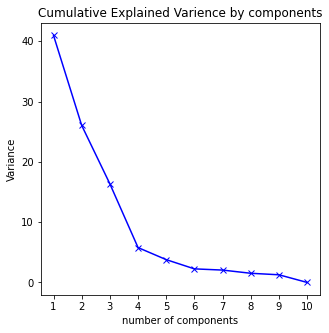

In [70]:
plt.figure(figsize=(5,5))
plt.plot(range(1,len(var)+1), var,'bx-')
plt.xticks(range(1,len(var)+1))
plt.xlabel("number of components")
plt.ylabel("Variance")
plt.title('Cumulative Explained Varience by components')
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

**Perform PCA with the chosen number of components.(3)**

In [71]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
scores_pca = pca.transform(df_scaled)
pd.DataFrame(scores_pca)

,0,1,2
0,0.587711,0.315973,0.142220
1,-0.104486,-0.006311,-0.019269
2,0.263723,-0.021419,-0.103703
3,-0.106195,-0.030524,-0.005743
4,-0.082888,0.040639,-0.019838
...,...,...,...
6576,-0.107159,-0.044183,0.001887
6577,-0.098311,-0.082986,0.040429
6578,-0.108879,-0.097326,0.034425
6579,-0.076660,0.127508,-0.068151


We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

## **Find the Optimal Number of Clusters PCA calculated**
We iterate the values of k from 1 to 10 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [72]:
K = range(1, 11)
inertias = []
distortions = []
distortion_map = {}
inertia_map = {}

#create list to hold inertias values for each k(number of clusters)
# The one with the lowest inertias can be chosen to be number of clusters

for k in K:
	# Building and fitting the model
    kmeanModel_pca = KMeans(n_clusters=k)
    kmeanModel_pca.fit(scores_pca)
    inertias.append(kmeanModel_pca.inertia_)
    distortions.append(sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
										'euclidean'), axis=1)) / scores_pca.shape[0])
    distortion_map[k] = sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
                                   'euclidean'), axis=1)) / scores_pca.shape[0]
    inertia_map[k] = kmeanModel_pca.inertia_


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

**Visualize results with Inertia~ Intra-cluster Distances**

In [73]:
for key, val in inertia_map.items():
	print(f'{key} : {val}')

1 : 912.739542028687
2 : 621.5326223799273
3 : 418.33912693275084
4 : 278.9450749866264
5 : 167.7501802868702
6 : 134.7915569112996
7 : 108.96872252778076
8 : 87.05485884351145
9 : 74.15194370364273
10 : 61.827038099479424


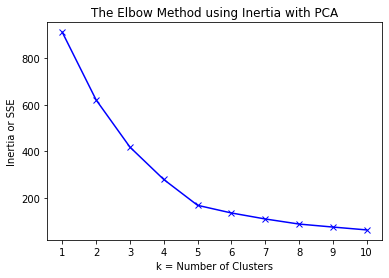

In [74]:
#visualize results
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Inertia with PCA')
plt.show()

**Visualize results with Distortions~Inter-cluster Distances**

In [75]:
for key, val in distortion_map.items():
	print(f'{key} : {val}')

1 : 0.27979125561254387
2 : 0.2159516802684959
3 : 0.19642624617938756
4 : 0.13965784061026917
5 : 0.10669343469419783
6 : 0.09653284665741177
7 : 0.0903317351965489
8 : 0.07637246832256248
9 : 0.06725670245226616
10 : 0.062272800076234106


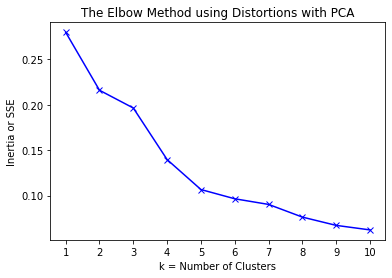

In [76]:
#visualize results
plt.plot(K, distortions, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Distortions with PCA')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5

**Perform K-Means Clustering with PCA using Optimal K**



In [77]:
#instantiate the k-means class, using optimal number of clusters
kmeanModel_pca = KMeans( n_clusters=5)

# We are going to use the fit predict method that returns for each observation 
# which cluster it belongs to. The cluster to which #client belongs and it will
# return this cluster numbers into a single vector that is  called y K-means
#fit k-means algorithm to data
kmeanModel_pca = kmeanModel_pca.fit(scores_pca)
kmeanClusters_pca = kmeanModel_pca.fit_predict(scores_pca)

#view cluster assignments for each observation
kmeanModel_pca.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 3, ..., 0, 0, 0], dtype=int32)

List of Centers of the selected K_Model with PCA for each cluster(rows) and selectedPCA columns(columns)

In [78]:
pd.DataFrame(kmeanModel_pca.cluster_centers_)

,0,1,2
0,-0.101539,-0.045268,0.011728
1,0.589030,0.166118,0.256533
2,-0.064934,0.756736,-0.377259
3,0.186049,-0.122850,-0.146931
4,-0.573791,0.238951,0.303659


Inertia of the selected K_Model with PCA

In [79]:
kmeanModel_pca.inertia_

167.7501802868702

Distortion of the selected K_Model with PCA

In [80]:
sum(np.min(cdist(scores_pca, kmeanModel_pca.cluster_centers_,
										'euclidean'), axis=1)) / scores_pca.shape[0]

0.10669343469419783

Append cluster assingments to original DataFrame

In [81]:
#append cluster assingments to original DataFrame
df_kmeans_pca = pd.concat([df_dataset.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_kmeans_pca.columns.values[-3:] = ['Component1', 'Component2','Component3']
df_kmeans_pca['cluster_k_PCA'] = kmeanModel_pca.labels_

#view updated DataFrame
df_kmeans_pca.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Component1,Component2,Component3,cluster_k_PCA
0,video,529,512,262,432,92,3,1,1,0,0.587711,0.315973,0.142220,1
1,photo,150,0,0,150,0,0,0,0,0,-0.104486,-0.006311,-0.019269,0
2,video,227,236,57,204,21,1,1,0,0,0.263723,-0.021419,-0.103703,3
3,photo,111,0,0,111,0,0,0,0,0,-0.106195,-0.030524,-0.005743,0
4,photo,213,0,0,204,9,0,0,0,0,-0.082888,0.040639,-0.019838,0


We create a new column named ‘Segment’ and map the four clusters directly inside it.

#**Data Visualisation**

##**Visualising the clusters**

In [82]:
kmeanClusters_pca

array([1, 0, 3, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

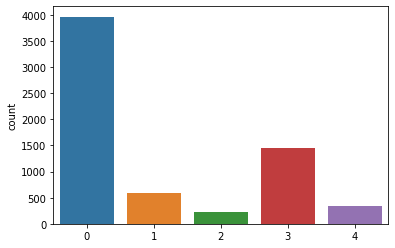

In [83]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(kmeanClusters_pca)


From the above countplot we can see that there are more number of users engaging in the cluster 1(Orange color).
same colors are used to plot the clusters(In 3d scatter plot below).

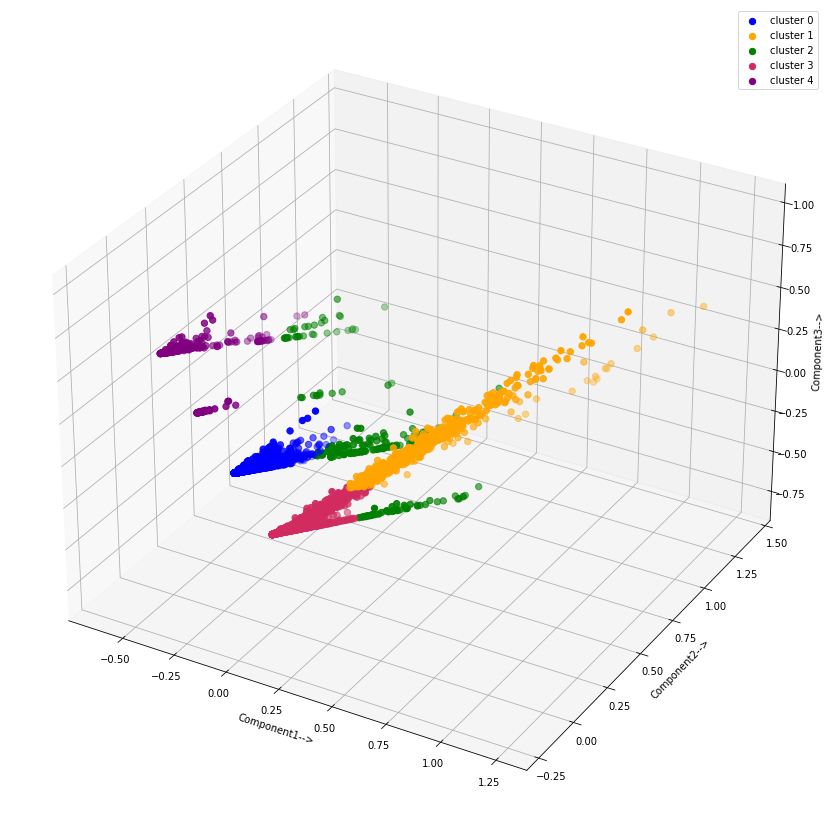

In [84]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores_pca[kmeanClusters_pca == 0,0],scores_pca[kmeanClusters_pca == 0,1],scores_pca[kmeanClusters_pca == 0,2], s = 40 , color = 'blue',   label = "cluster 0")
ax.scatter(scores_pca[kmeanClusters_pca == 1,0],scores_pca[kmeanClusters_pca == 1,1],scores_pca[kmeanClusters_pca == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(scores_pca[kmeanClusters_pca == 2,0],scores_pca[kmeanClusters_pca == 2,1],scores_pca[kmeanClusters_pca == 2,2], s = 40 , color = 'green',  label = "cluster 2")
ax.scatter(scores_pca[kmeanClusters_pca == 3,0],scores_pca[kmeanClusters_pca == 3,1],scores_pca[kmeanClusters_pca == 3,2], s = 40 , color = '#D12B60',label = "cluster 3")
ax.scatter(scores_pca[kmeanClusters_pca == 4,0],scores_pca[kmeanClusters_pca == 4,1],scores_pca[kmeanClusters_pca == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Component1-->')
ax.set_ylabel('Component2-->')
ax.set_zlabel('Component3-->')
ax.legend()
plt.show()

In [85]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Component1 -->'),yaxis = dict(title  = 'Component2--->'),zaxis = dict(title  = 'Component3-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeanModel_pca.labels_
trace = go.Scatter3d(x=scores_pca[:, 0], y=scores_pca[:, 1], z=scores_pca[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [86]:
x_axis = df_kmeans_pca['Component2']
y_axis = df_kmeans_pca['Component1']
plt.figure(figsize = (10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

##**Visualising Data with respect to different clusters**

In [87]:
#append cluster assingments to original DataFrame
df_dataset['cluster'] = kmeanModel_pca.labels_
df_dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,3
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0


###**Cluster 0**

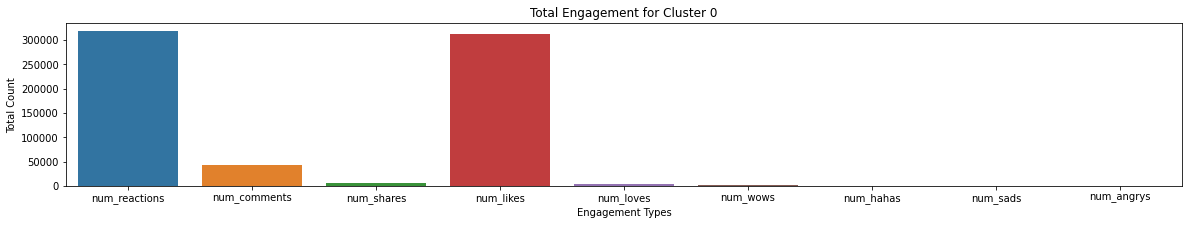

In [91]:
# Create a dataframe for cluster 0
cluster0_df = df_dataset[df_dataset['cluster'] == 0]


# Set the x-axis and y-axis values
cols = list(df_dataset)
x_axis = cols[1:-1]
y_axis = list()
for c in cols[1:-1]:
  y_axis.append(cluster0_df[c].sum())
  
plt.figure(figsize=(20,3))
# Create a bar plot with seaborn
sns.barplot(x = x_axis,  y = y_axis)
# sns.barplot(x = x_axis,  y = y_axis, palette=bar_colors)

# Add a title and labels to the plot
plt.title('Total Engagement for Cluster 0')
plt.xlabel('Engagement Types')
plt.ylabel('Total Count')

# Show the plot
plt.show()

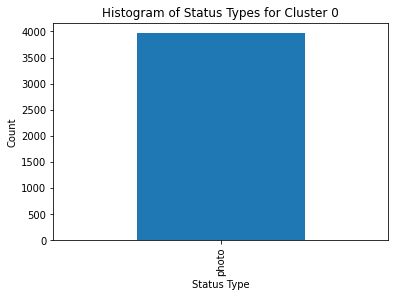

In [92]:
hist_data = cluster0_df.groupby('status_type').size()

hist_data.plot(kind='bar')
plt.title('Histogram of Status Types for Cluster 0')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

**Observation**
* This cluster contains sellers who have relatively low engagement rates with their viewers as indicated by the lower number of reactions, comments, and shares. 
* The sellers in this cluster are more likely to have lower overall ratings, and they tend to post only Photos

###**Cluster 1**

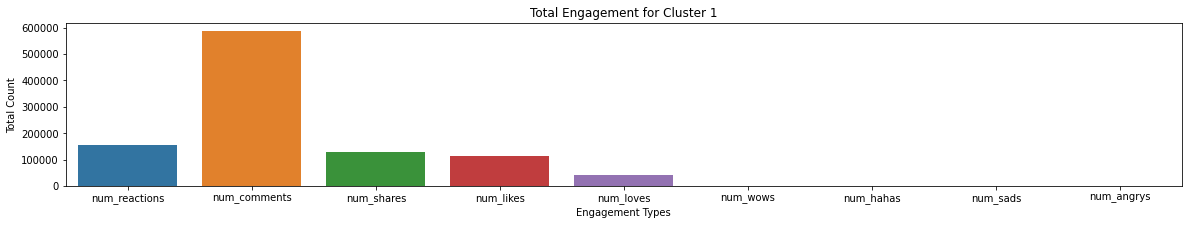

In [94]:
# Create a dataframe for cluster 1
cluster1_df = df_dataset[df_dataset['cluster'] == 1]
# Set the x-axis and y-axis values
cols = list(df_dataset)
x_axis = cols[1:-1]
y_axis = list()
for c in cols[1:-1]:
  y_axis.append(cluster1_df[c].sum())
  
plt.figure(figsize=(20,3))
# Create a bar plot with seaborn
sns.barplot(x = x_axis,  y = y_axis)

# Add a title and labels to the plot
plt.title('Total Engagement for Cluster 1')
plt.xlabel('Engagement Types')
plt.ylabel('Total Count')

# Show the plot
plt.show()

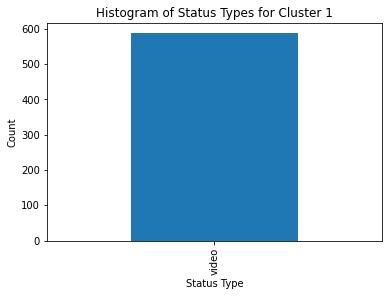

In [95]:
hist_data = cluster1_df.groupby('status_type').size()

hist_data.plot(kind='bar')
plt.title('Histogram of Status Types for Cluster 1')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

**Observation**
* This cluster contains sellers who have higher levels of engagement with their viewers compared to Cluster 0, as indicated by higher levels of reactions, comments, and shares. 
* The sellers in this cluster also tend to post only videos

###**Cluster 2**

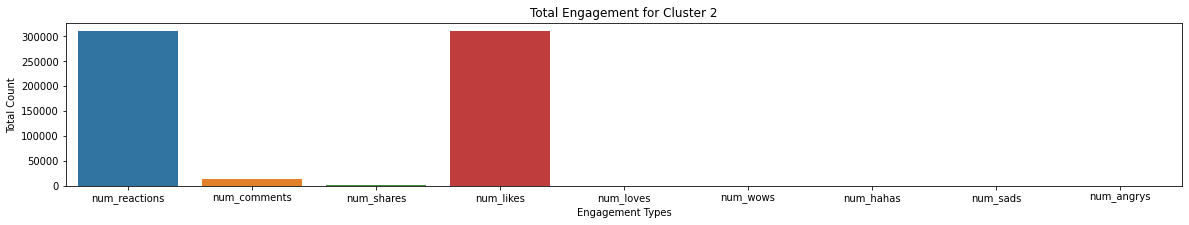

In [96]:
# Create a dataframe for cluster 2
cluster2_df = df_dataset[df_dataset['cluster'] == 2]
# Set the x-axis and y-axis values
cols = list(df_dataset)
x_axis = cols[1:-1]
y_axis = list()
for c in cols[1:-1]:
  y_axis.append(cluster2_df[c].sum())
  
plt.figure(figsize=(20,3))
# Create a bar plot with seaborn
sns.barplot(x = x_axis,  y = y_axis)

# Add a title and labels to the plot
plt.title('Total Engagement for Cluster 2')
plt.xlabel('Engagement Types')
plt.ylabel('Total Count')

# Show the plot
plt.show()

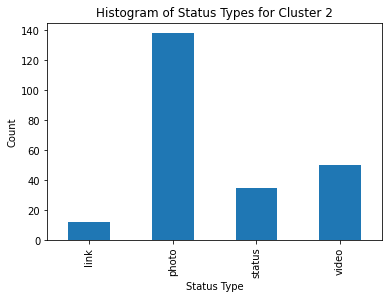

In [99]:

hist_data = cluster2_df.groupby('status_type').size()

hist_data.plot(kind='bar')
plt.title('Histogram of Status Types for Cluster 2')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

**Observation**
* This cluster contains sellers who have high levels of reactions and shares but relatively low levels of comments. 
* These sellers may have a strong following or influence, but they may not be as interactive with their viewers as sellers in Cluster 1.
* The sellers in this cluster also tend to post only multiple content

###**Cluster 3**

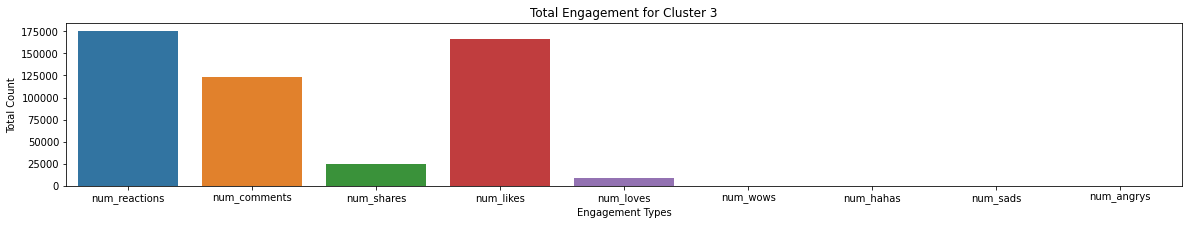

In [100]:
# Create a dataframe for cluster 3
cluster3_df = df_dataset[df_dataset['cluster'] == 3]
# Set the x-axis and y-axis values
cols = list(df_dataset)
x_axis = cols[1:-1]
y_axis = list()
for c in cols[1:-1]:
  y_axis.append(cluster3_df[c].sum())
  
plt.figure(figsize=(20,3))
# Create a bar plot with seaborn
sns.barplot(x = x_axis,  y = y_axis)

# Add a title and labels to the plot
plt.title('Total Engagement for Cluster 3')
plt.xlabel('Engagement Types')
plt.ylabel('Total Count')

# Show the plot
plt.show()


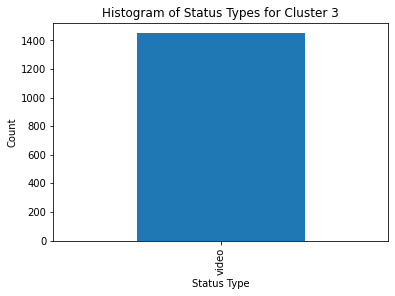

In [101]:

hist_data = cluster3_df.groupby('status_type').size()

hist_data.plot(kind='bar')
plt.title('Histogram of Status Types for Cluster 3')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

**Observation**
* This cluster contains sellers who have the highest levels of engagement across all metrics, with significantly higher numbers of reactions, comments, and shares compared to other clusters. 
* These sellers also tend to post only videos, suggesting that their engagement with viewers is positively correlated with the success of their broadcasts.

###**Cluster 4**

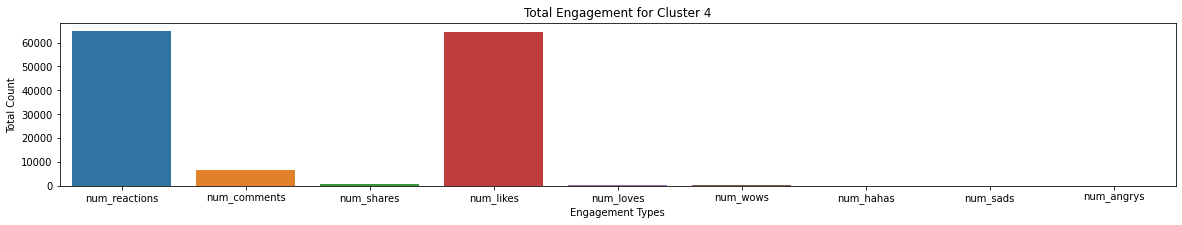

In [102]:
# Create a dataframe for cluster 3
cluster3_df = df_dataset[df_dataset['cluster'] == 4]
# Set the x-axis and y-axis values
cols = list(df_dataset)
x_axis = cols[1:-1]
y_axis = list()
for c in cols[1:-1]:
  y_axis.append(cluster3_df[c].sum())
  
plt.figure(figsize=(20,3))
# Create a bar plot with seaborn
sns.barplot(x = x_axis,  y = y_axis)

# Add a title and labels to the plot
plt.title('Total Engagement for Cluster 4')
plt.xlabel('Engagement Types')
plt.ylabel('Total Count')

# Show the plot
plt.show()


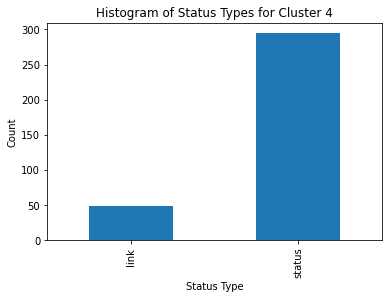

In [103]:

hist_data = cluster3_df.groupby('status_type').size()

hist_data.plot(kind='bar')
plt.title('Histogram of Status Types for Cluster 4')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

**Observations**
* This cluster contains sellers who have very low engagement rates with their viewers across all metrics. 
* The sellers in this cluster tend to broadcast shorter videos ie. status, aand also some links

## **Visualising different Correlation Heatmap**

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

In [ ]:
i = 0

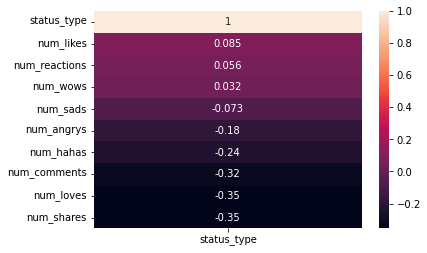

In [ ]:
 # correlation matrix
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

status_type is not highly correlated with any other feature

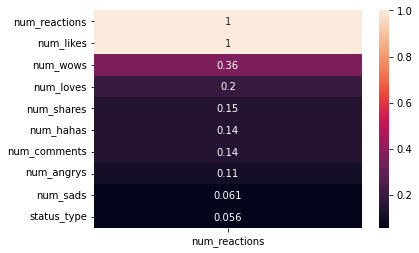

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_reaction is highly correlated with num_likes

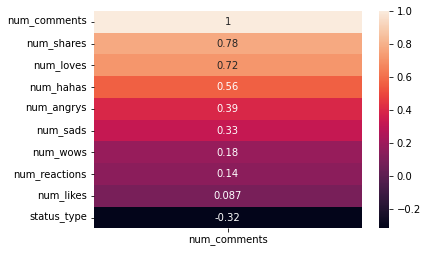

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_comments is highly correlated with num_shares, num_loves and even at some extend to num_hahas

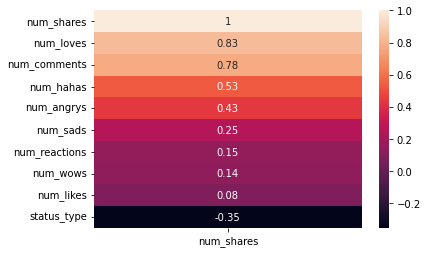

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_shares is highly correlated with num_comments, num_loves and even at some extend to num_hahas and num_angrys

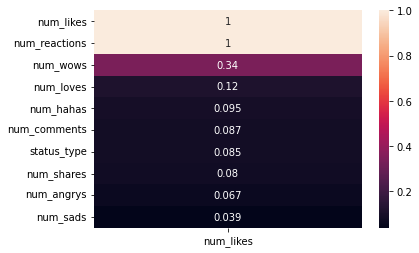

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_reaction is highly correlated with num_likes and vice verse

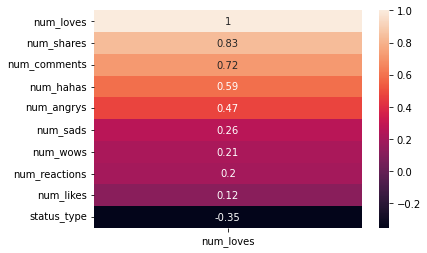

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_loves is highly correlated with num_shares, num_comments and even at some extend to num_hahas or num_angrys
status_type is not highly correlated with any other feature
num_reaction is highly correlated with num_likes

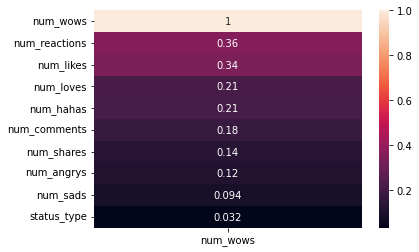

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

status_wows is not highly correlated with any other feature

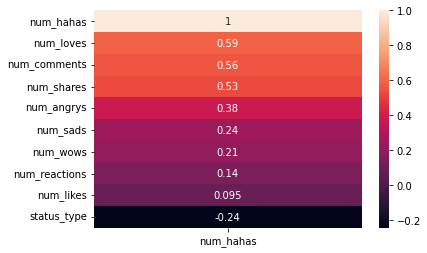

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_hahas is somewhat correlated with num_shares, num_loves and num_coments
status_type is not highly correlated with any other feature
num_reaction is highly correlated with num_likes

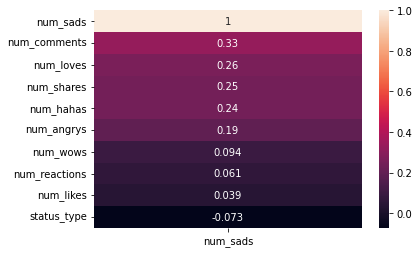

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_sads is not highly correlated with any other feature

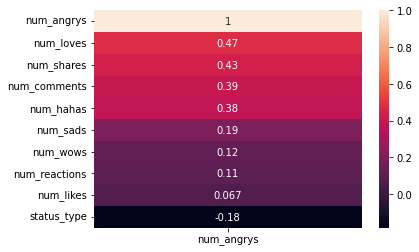

In [ ]:
corr = ((df_scaled.corr().iloc[:,i]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
i +=1

num_angrys is somewhat correlated with num_shares and num_loves

#**Perform PCA with the 2 components for the experimental purpose to get a 2-D graph**


In [ ]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
scores_pca_2 = pca.transform(df_scaled)
pd.DataFrame(scores_pca_2)


,0,1
0,0.603614,0.311927
1,-0.104482,-0.011058
2,0.269096,-0.015463
3,-0.106018,-0.035717
4,-0.081893,0.036062
...,...,...
6644,-0.106885,-0.049627
6645,-0.097431,-0.089828
6646,-0.108078,-0.103825
6647,-0.077108,0.124106


## **Find the Optimal Number of Clusters PCA calculated**

In [ ]:

K = range(1, 11)
inertias = []
distortions = []
distortion_map = {}
inertia_map = {}

#create a list to hold inertias values for each k(number of clusters)
# The one with the lowest inertias can be chosen to be the number of clusters

for k in K:
	# Building and fitting the model
    kmeanModel_pca_2 = KMeans(n_clusters=k)
    kmeanModel_pca_2.fit(scores_pca_2)
    inertias.append(kmeanModel_pca_2.inertia_)
    distortions.append(sum(np.min(cdist(scores_pca_2, kmeanModel_pca_2.cluster_centers_,
										'euclidean'), axis=1)) / scores_pca_2.shape[0])
    distortion_map[k] = sum(np.min(cdist(scores_pca_2, kmeanModel_pca_2.cluster_centers_,
                                   'euclidean'), axis=1)) / scores_pca_2.shape[0]
    inertia_map[k] = kmeanModel_pca_2.inertia_


**Visualize results with Inertia~ Intra-cluster Distances**

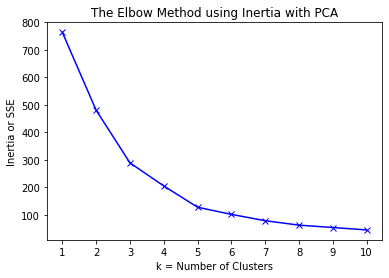

In [ ]:

#visualize results
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Inertia with PCA')
plt.show()



**Visualize results with Distortions~Inter-cluster Distances**

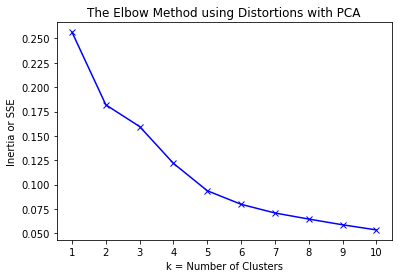

In [ ]:

#visualize results
plt.plot(K, distortions, 'bx-')
plt.xticks(K)
plt.xlabel("k = Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.title('The Elbow Method using Distortions with PCA')
plt.show()



To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5

**Perform K-Means Clustering with PCA using Optimal K**

In [ ]:


#instantiate the k-means class, using the optimal number of clusters
kmeanModel_pca_2= KMeans( n_clusters=5)

# We are going to use the fit predict method that returns for each observation 
# which cluster it belongs to. The cluster to which #client belongs and it will
# return this cluster numbers into a single vector that is  called y K-means
#fit k-means algorithm to data
kmeanModel_pca_2= kmeanModel_pca_2.fit(scores_pca_2)
kmeanClusters_pca_2= kmeanModel_pca_2.fit_predict(scores_pca_2)

#view cluster assignments for each observation
kmeanModel_pca_2.labels_

array([0, 1, 4, ..., 1, 1, 1], dtype=int32)

##**Visualising the clusters**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

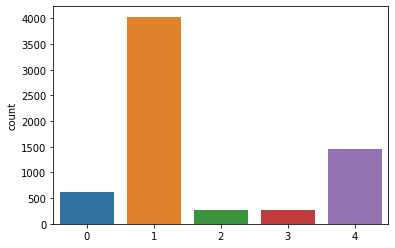

In [ ]:

# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(kmeanClusters_pca_2)

From the above countplot we can see that there are more users in cluster 1(Orange color).
same colors are used to plot the clusters(In 3d scatter plot below).

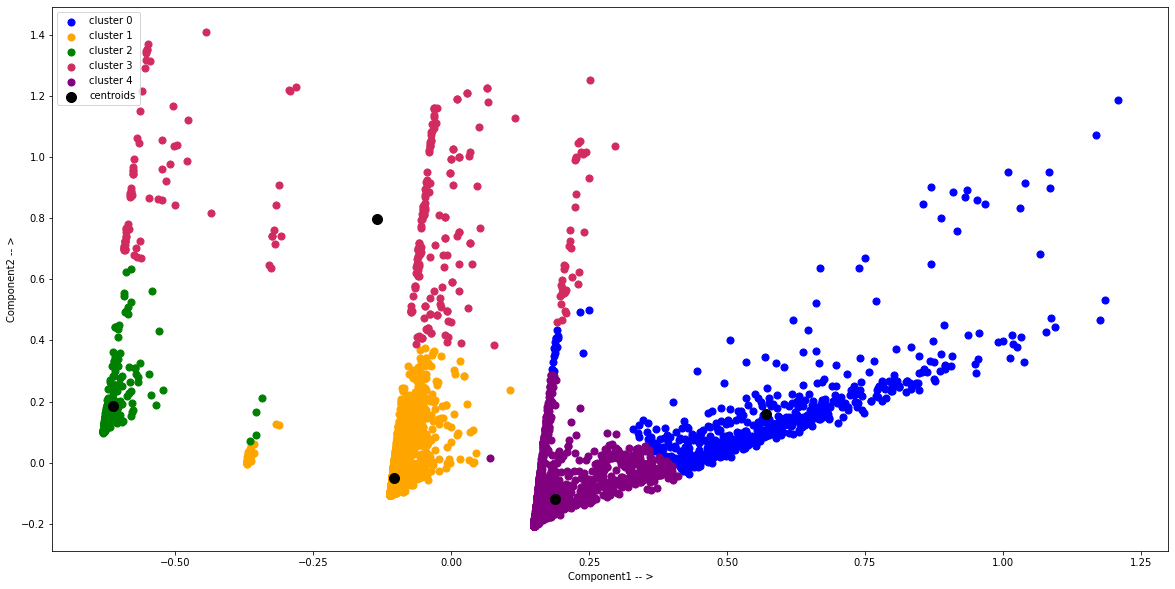

In [ ]:
# 2d scatterplot using matplotlib
plt.figure(figsize = (20,10))
plt.scatter(scores_pca_2[kmeanClusters_pca_2 == 0,0],scores_pca_2[kmeanClusters_pca_2 == 0,1],s = 50, c = 'blue',   label = "cluster 0")
plt.scatter(scores_pca_2[kmeanClusters_pca_2 == 1,0],scores_pca_2[kmeanClusters_pca_2 == 1,1],s = 50, c = 'orange', label = "cluster 1")
plt.scatter(scores_pca_2[kmeanClusters_pca_2 == 2,0],scores_pca_2[kmeanClusters_pca_2 == 2,1],s = 50, c = 'green',  label = "cluster 2")
plt.scatter(scores_pca_2[kmeanClusters_pca_2 == 3,0],scores_pca_2[kmeanClusters_pca_2 == 3,1],s = 50, c = '#D12B60',label = "cluster 3")
plt.scatter(scores_pca_2[kmeanClusters_pca_2 == 4,0],scores_pca_2[kmeanClusters_pca_2 == 4,1],s = 50, c = 'purple', label = "cluster 4")
plt.scatter(kmeanModel_pca_2.cluster_centers_[:,0],kmeanModel_pca_2.cluster_centers_[:,1], s = 100, c = "black",   label = "centroids")
plt.xlabel("Component1 -- >")
plt.ylabel("Component2 -- >")
plt.legend()
plt.show()

#**Future Scope of improvement**

To further improve the model, we can perform feature selection method to select features that are most improtant

K-means clustering algorithm can be significantly improved by using a better initialization technique, and by repeating (re-starting) the algorithm.



# **Reflections**

# **References**

[1] [Easiest way to download kaggle data in Google Colab](https://www.kaggle.com/general/74235)

[2] [5 Stages of Data Preprocessing for K-means clustering](https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932)

[3] [Kmeans Classifier](https://github.com/coen2812023/Classification/blob/main/kmeans.ipynb)

[4] [How to Plot K-Means Clusters with Python?](https://www.askpython.com/python/examples/plot-k-means-clusters-python)

[5] [Implementation of Principal Component Analysis(PCA) in K Means Clustering](https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6)

[6] [Kmeans clustering and cluster visualization in 3D](https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook)